In [2]:
%matplotlib widget

## Lecture Notes

### Conditional PMF

When conditioning on an event C, the probability that event A AND event B is taken, and we normalize by $P[B]$ 

$p_x(A|B)=P[A|B]=\frac{P[A \cup B]}{P[B]}$

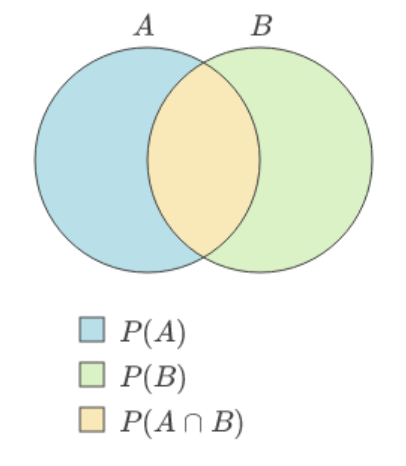

### Theorem of total probability

If $B_1, B_2,..,B_n$ forms as partition of the sample space and $p_x(x|B_i)$ is the conditional PMF of x given event $B_i$.  
By summing all the conditionals and multiplying each with $P[B_i]$ we get the marginal probability. 

$$
p_x(x)=\sum_{i=1}^{n} p_x(x|B_i)P[B_i]
$$


### Conditional 

If X is an RVadn we kno that event B has happened, the conditional expected value can be found by

$$
\mathbb{E}[X \mid B] = \sum_{i=1}^{n} x_i p_x(x_i |B)
$$

Likewise the variance can be found

$$
Var[X \mid B] = \mathbb{E}[(X - \mu_{x|B})^2\mid B] = \sum_{i=1}^{n} (x_i - \mu_{x|B})^2 p_x(x_i |B)
$$

### Joint CDF

The marginal CDF for X can be found by integrating over the full range of Y.

$F_x(x)=F_{x,y}(x, \infty)=P[X \leq x, Y \leq \infty]=P[X \leq x]$

### Independence

X and Y are independent if $P[X \in A_1, Y \in A_2] = P[X \in A_1 ] P[ Y \in A_2]$

For discrete RV 

$p_{x,y}(x_j, y_k)=P[X=x_j, Y=y_k]=P[X=x_j]P[Y=y_j]$

For CDF

$F_{x,y}(x_j, y_k)=P[X \leq x, Y \leq y]=P[X \leq x]P[Y \leq y]$

For Continous

$f_{x,y}(x, y)=f(x)f(y)$

## Problems

### Problem O3.1

Use a plotting program in Matlab or Python to show the pdf for jointly Gaussian zero-mean  
random variables with the following parameters:  
σ1 = 1; σ2 = 1; ρ = 0  
σ1 = 1; σ2 = 1; ρ = 0. 8  
σ1 = 1; σ2 = 0. 25; ρ = − 0. 8  
σ1 = 1; σ2 = 10; ρ = 0. 8  
Verify that the shape of the pdf is consistent with the observations made in slide 24 of Lecture 3.  
For instance, in which cases the principal axes of the equal-pdf contours aligned with x- and y-  
axis and in which cases they are oriented along an angle  

The covariance of two random variables X and Y is defined as: $Cov(X,Y)=\rho \sigma_X \sigma_Y$

The covariance matrix for two jointly Gaussian random variables is defined as:  
$$
\Sigma = 
\begin{bmatrix}
Var(X) & Cov(X,Y) \\
Cov(X,Y) & Var(Y)
\end{bmatrix}
=
\begin{bmatrix}
\sigma_X^2 & \rho \sigma_X \sigma_Y \\
\rho \sigma_X \sigma_Y & \sigma_Y^2
\end{bmatrix}
$$

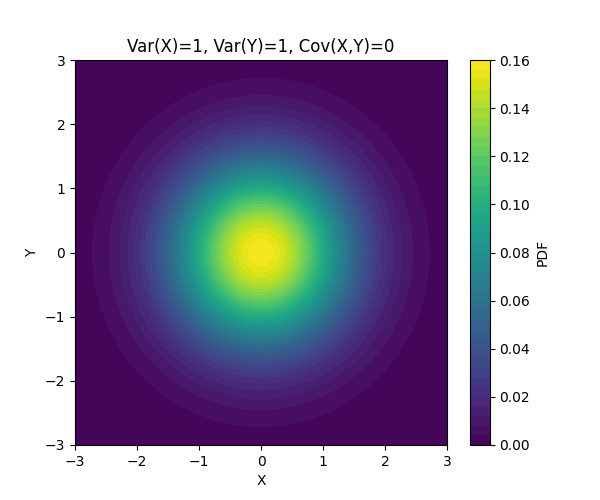

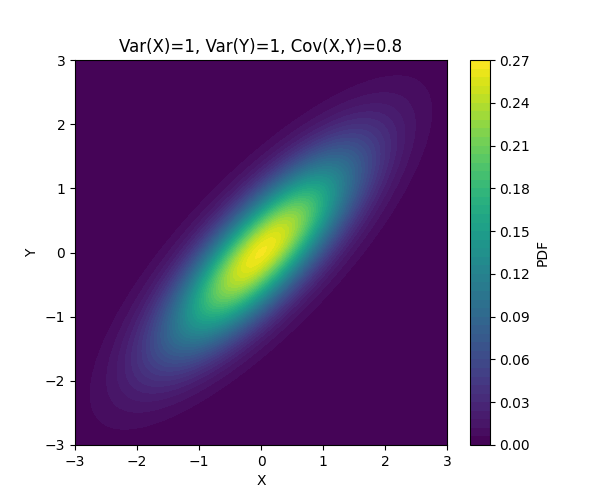

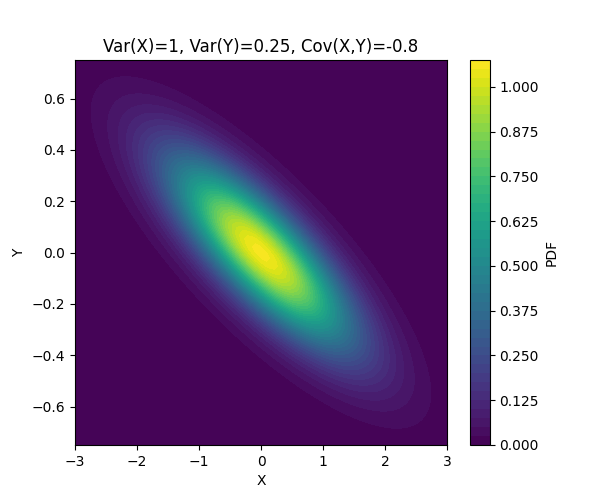

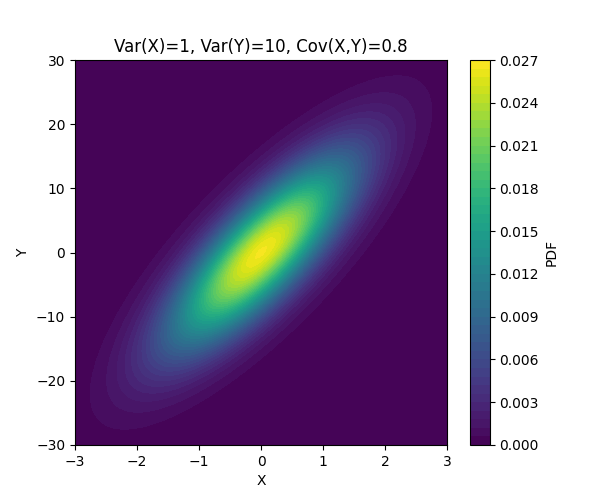

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

vars_1 = [1, 1, 1, 1]
vars_2 = [1, 1, 0.25, 10]
corrs = [0, 0.8, -0.8, 0.8]

for n in range(len(vars_1)):
    
    mean = [0, 0] 
    cov = [[vars_1[n]**2, corrs[n]*vars_1[n]*vars_2[n]],
           [corrs[n]*vars_1[n]*vars_2[n] , vars_2[n]**2]]

    x = np.linspace(-3*vars_1[n], 3*vars_1[n], 100)
    y = np.linspace(-3*vars_2[n], 3*vars_2[n], 100)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))
    
    rv = multivariate_normal(mean, cov)
    Z = rv.pdf(pos)
    
    plt.figure(figsize=(6,5))
    plt.contourf(X, Y, Z, levels=50, cmap='viridis')  # Filled contours
    plt.colorbar(label='PDF')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f"Var(X)={vars_1[n]}, Var(Y)={vars_2[n]}, Cov(X,Y)={corrs[n]}")

### Problem O3.2

Assume a joint PMF of two random variables X and Y, taking on values i=0,1 and j=0,1
respectively, as given in the following table

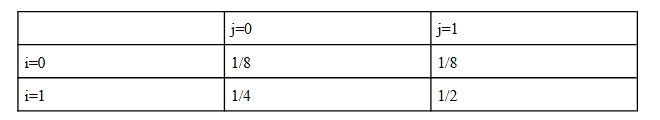

Write an Octave/Matlab program to generate a set of M=1000 realizations of this 2D random
variable (X,Y). Once the realizations are available, estimate the joint PMF and marginal PMFs
from those M=1000 realizations and plot those in Octave/Matlab. Are the resulting estimates
close to the theoretical values obtained from the above table? (Hint: Use the procedure similar to
the one given in this slide)

In [4]:
n_samples = 1000

# Define values
vals = np.array([(0,0), (0,1), (1,0), (1,1)])
p = np.array([1/8, 1/8, 1/4, 1/2])
idxs =  np.random.choice(len(vals), size=n_samples, p=p)
samples = vals[idxs]

p_x = np.array([2/8, 6/8])
p_y = np.array([3/8, 5/8])

count_pmf = np.array([0, 0, 0, 0])
count_marginal_x_pmf = np.array([0, 0])
count_marginal_y_pmf = np.array([0, 0])

for s in samples:
    
    # Y Varies
    if s[0] == 0 and s[1] == 0:
        count_pmf[0] += 1
        count_marginal_x_pmf[0] += 1
        count_marginal_y_pmf[0] += 1
        
    elif s[0] == 0 and s[1] == 1:
        count_pmf[1] += 1
        count_marginal_x_pmf[0] += 1
        count_marginal_y_pmf[1] += 1

    # X Varies
    elif s[0] == 1 and s[1] == 0:
        count_pmf[2] += 1
        count_marginal_x_pmf[1] += 1
        count_marginal_y_pmf[0] += 1
    else:
        count_pmf[3] += 1
        count_marginal_x_pmf[1] += 1
        count_marginal_y_pmf[1] += 1

p_est = count_pmf/n_samples
p_x_est = count_marginal_x_pmf/n_samples
p_y_est = count_marginal_y_pmf/n_samples

print(f"p_est:\n{np.round(p_est, 3)}\np:\n{np.round(p, 3)}")
print(f"p_x_est:\n{np.round(p_x_est, 3)}\np_x:\n{np.round(p_x, 3)}")
print(f"p_y_est:\n{np.round(p_y_est, 3)}\np_y:\n{np.round(p_y, 3)}")

p_est:
[0.126 0.139 0.262 0.473]
p:
[0.125 0.125 0.25  0.5  ]
p_x_est:
[0.265 0.735]
p_x:
[0.25 0.75]
p_y_est:
[0.388 0.612]
p_y:
[0.375 0.625]


### Problem O3.3

A modem sends a two-dimensional signal $X=(𝑋_1, 𝑋_2)$ from the set  
$\{(1, 1), (1, − 1), (− 1, 1), (− 1, − 1)\}$
The channel adds a noise signal $(𝑁_1, 𝑁_2)$ so the received 
signal is $𝑌 = 𝑋 + 𝑁$.

**(a)** Generate 10,000 discrete random variables (in Octave) uniformly distributed in the set $\{1,2,3,4\}$  
Assign each outcome in this set to one of the signals $\{(1, 1), (1, − 1), (− 1, 1), (− 1, − 1)\}$.  
The sequence of discrete random variables then
produces a sequence of 10,000 signal points $X$. 

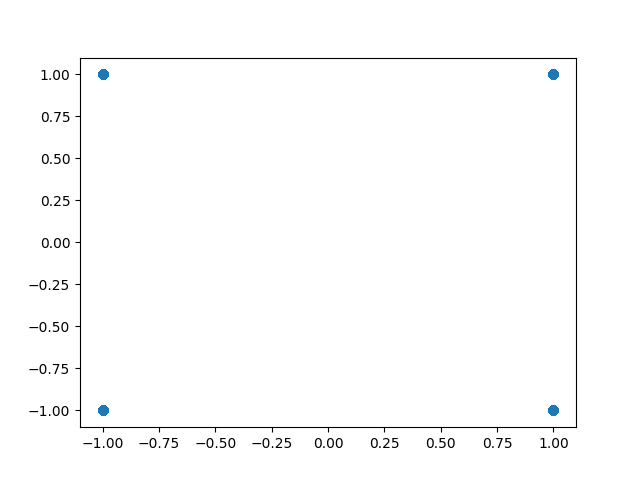

In [5]:
n_samples = 10000

# Define values
vals = np.array([(1,1), (1,-1), (-1,1), (-1,-1)])
p = np.array([1/4, 1/4, 1/4, 1/4])
idxs =  np.random.choice(len(vals), size=n_samples, p=p)
x = vals[idxs]

plt.figure()
plt.scatter(x[:, 0], x[:, 1])


**(b)** Generate 10,000 noise pairs N of independent zero-mean, unit-variance jointly Gaussian
random variables

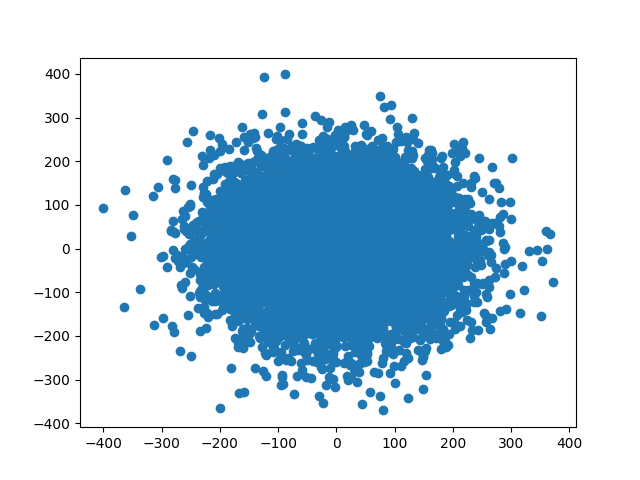

In [47]:
mean = [0,0]
sigma2 = 10000
cov = [[sigma2, 0],[0, sigma2]]

n = np.random.multivariate_normal(mean, cov, n_samples)
plt.figure()
plt.scatter(n[:, 0], n[:, 1], alpha=1)

**(c)** Form the sequence of 10,000 received signals

In [48]:
#y = np.zeros(n_samples)

y = x+n
print(y)

[[-142.60980057  -23.56279555]
 [  12.58813461   15.5701754 ]
 [  71.73986984  174.25263425]
 ...
 [ -19.44794035  -52.06047776]
 [ -32.10776385   41.42740803]
 [ -63.68937257   14.00595888]]


**d)**  Plot the scattergram of received signal vectors in Octave. Is the plot what you expected

In [49]:
theta = np.arctan2(x[:, 0], x[:, 1])
print(theta)
unique = np.unique(theta)

y_0 = y[theta==unique[0]]
y_1 = y[theta==unique[1]]
y_2 = y[theta==unique[2]]
y_3 = y[theta==unique[3]]

[-2.35619449  0.78539816  0.78539816 ...  2.35619449  2.35619449
  2.35619449]


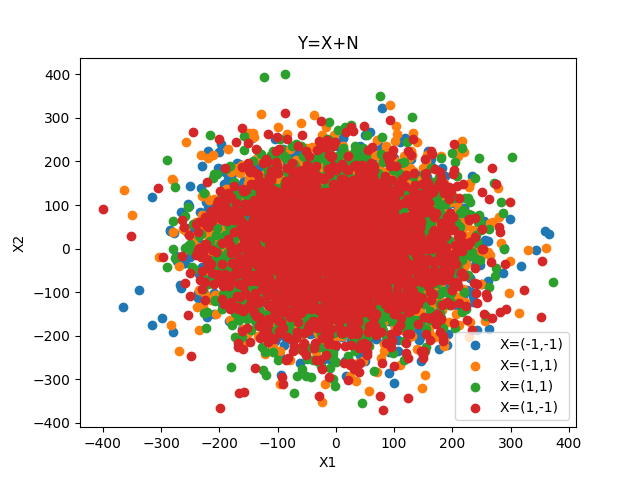

In [50]:
plt.figure()
plt.scatter(y_0[:,0], y_0[:,1], alpha=1, label="X=(-1,-1)")
plt.scatter(y_1[:,0], y_1[:,1], alpha=1, label="X=(-1,1)")
plt.scatter(y_2[:,0], y_2[:,1], alpha=1, label="X=(1,1)")
plt.scatter(y_3[:,0], y_3[:,1], alpha=1, label="X=(1,-1)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Y=X+N")
plt.legend()

Since we have unit variance, and the mean is shifted by $\sqrt{2}$ in each quadrant, we dont expect to see 4 clear clusters

**e) and f)**   
Estimate the transmitted signal by the quadrant that $Y$ falls in: $\hat{X}=\{sgn(Y_1), sgn(Y_2)\}$   
Compare the estimates with the actually transmitted signals to estimate the probability of
error.

In [51]:
def quadrant_error(sample, quadrant):

    return np.linalg.norm(sample-quadrant)

def estimate_quadrant(sample, quadrants):

    min_error = 1e6
    quadrant_est = None
    
    for quadrant in quadrants:

        err = quadrant_error(sample, quadrant)
        if err < min_error:
            min_error = err
            quadrant_est = quadrant
    return quadrant_est

def estimate_error(x, y, quadrants):

    error_count = 0

    for x_, y_ in zip(x,y):
        x_est = estimate_quadrant(y_, quadrants)
        if np.array_equal(x_, x_est) == False:
            error_count += 1

    return error_count/len(x)

print(estimate_error(x, y, vals))
    

0.7526


In the first quadrant $Q_1=(1,1)$, the probability for an error transmission is equal to the event that $P[Y_1 \leq 0 \cup Y_2 \leq 0]$

In terms of transmission success, $P[Y_1 \leq 0 \cup Y_2 \leq 0]=1-P[Y_1 \ge 0 \cap Y_2 \ge 0]$

Since $N_1$ and $N_2$ are independent, this can be rewritten to

$1-P[Y_1 \ge 0 \cap Y_2 \ge 0]=1-P[Y_1 \ge 0]P[ Y_2 \ge 0]$

In the other quadrant the error probability is the same, even though the limits are different. Hence we only calculate probability for one quadrant.

In [9]:
from scipy.stats import norm

y_1_greater_than_0 = 1-norm.cdf(0, loc=1, scale=1)
y_2_greater_than_0 = 1-norm.cdf(0, loc=1, scale=1)
print(f"error_probability: {1 - y_1_greater_than_0 * y_2_greater_than_0}")

error_probability: 0.29213901826285904
